### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("dark")
sns.set_style("whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-greenhouse-gas-emissions/greenhouse_gas_inventory_data_data.csv


### Reading data from the CSV file

In [3]:
#Data from https://www.kaggle.com/unitednations/international-greenhouse-gas-emissions

Either Download and uplaod the data or use Kaggle API with opendatasets

In [2]:
emission_table = pd.read_csv("/kaggle/input/international-greenhouse-gas-emissions/greenhouse_gas_inventory_data_data.csv")

In [4]:
emission_table.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


As we can see, the category data colum is having a large width that may bot be fit in pandas dataframe, hence using the colwidth for the better visibility of data across the category column.

In [5]:
pd.set_option('display.max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [6]:
by_category  = emission_table.groupby(['category'])

In [7]:
category_count = by_category.count()

In [8]:
category_count

,country_or_area,year,value
category,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,949,949,949
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,975,975,975
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,248,248,248
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,831,831,831
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,1032,1032,1032


As we know we need to slice the category names in many parts to get the exact name of the Green House Gas. Here we can see a common thing in every category name =, i.e. *"_in_kilotonne_co2_equivalent"* at the end of every category. So my workflow for next few hours will comprise of the following things.

  * Slicing the common part from each category name and updating that with a copy of the main dataframe.
  * Slicing GHG and the other required hyperparameters like - indirect co2 or land usage forestry etc. 

### Breaking the problem in smaller part and preparing a small algo

In [9]:
strp = category_count.index

In [10]:
io = strp[0]
io[108]

't'

In [11]:
io

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'

In [12]:
hdd = len(io)
hdd

109

In [13]:
io.find("_in_kilotonne_co2_equivalent",0,hdd)

81

In [14]:

io[:81]

'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf'

**Conclusion for the Algorithm is to run a for loop and update each category type one by onne, then update the main category dataframe.**

### Algorithm Begins

In [16]:

new_category_index = []
for string in strp:
    p = len(string)
    pos = string.find("_in_kilotonne_co2_equivalent",0,p)
    string = string[:pos]
    new_category_index.append(string)

In [17]:
new_category_index

['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf',
 'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'hydrofluorocarbons_hfcs_emissions',
 'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'nitrogen_trifluoride_nf3_emissions',
 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf',
 'perfluorocarbons_pfcs_emissions',
 'sulphur_hexafluoride_sf6_emissions',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions']

In [18]:
new_category_index_reborn = []
for lingo in new_category_index:
    q = len(lingo)
    pos = lingo.find("_without",0,p)
    lingo = lingo[:pos]
    new_category_index_reborn.append(lingo)

In [19]:
new_category_index_reborn

['carbon_dioxide_co2_emissions',
 'greenhouse_gas_ghgs_emissions_including_indirect_co2',
 'greenhouse_gas_ghgs_emissions',
 'hydrofluorocarbons_hfcs_emission',
 'methane_ch4_emissions',
 'nitrogen_trifluoride_nf3_emission',
 'nitrous_oxide_n2o_emissions',
 'perfluorocarbons_pfcs_emission',
 'sulphur_hexafluoride_sf6_emission',
 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emission']

In [20]:
short_category = ["co2","ghg(indirect co2)","ghg","hfc","ch4","nf3","n2o","pfc","sf6","hfc+pfc"]

In [21]:
category_count["Shorted_category"] = short_category

In [22]:
category_count

,country_or_area,year,value,Shorted_category
category,,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,co2
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,949,949,949,ghg(indirect co2)
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,ghg
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,975,975,975,hfc
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,ch4
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,248,248,248,nf3
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,1074,1074,1074,n2o
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,831,831,831,pfc
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,1032,1032,1032,sf6


### Cleaning the data for better comprehension

Replacing the category colum by the following:-
* carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent	= **CO2**
* greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent = **GHG(Indirect CO2)**
* greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **GHG**
* hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent = **HFC**
* methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **CH4**
* nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent = **NF3**
* nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent = **N2O**
* perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **PFC**
* sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent = **SF6**
* unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent = **HFC+PFC**

In [31]:
trying_emission = emission_table

Pragyan yeh delete krna hai kya? ya originally se refer kre?

### Abbreviations hi sahi hai. Access karne me aasani hogi

In [34]:
replaced_emission = trying_emission.replace(to_replace=["carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_"
                                     "forestry_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_including_indirect_co2"
                                    "_without_lulucf_in_kilotonne_co2_equivalent","greenhouse_gas_ghgs_emissions_without_land_use_land_use"
                                    "_change_and_forestry_lulucf_in_kilotonne_co2_equivalent","hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent",
                                    "methane_ch4_emissions_without_land_use_land_use_change"
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent",
                                    "nitrous_oxide_n2o_emissions_without_land_use_land_use_change" 
                                    "_and_forestry_lulucf_in_kilotonne_co2_equivalent","perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent",
                                    "sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent",
                                    "unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons"
                                    "_pfcs_emissions_in_kilotonne_co2_equivalent"], value = ["CO2","GHG(Indirect CO2)","GHG","HFC","CH4","NF3","N2O","PFC","SF6","HFC+PFC"])


In [35]:
# replacing and changing the data and it's index for better EDA(Exploratory Data Analysis)
l = replaced_emission.groupby(["category"],as_index=False)

In [36]:
l.count()

,category,country_or_area,year,value
0,CH4,1074,1074,1074
1,CO2,1074,1074,1074
2,GHG,1074,1074,1074
3,GHG(Indirect CO2),949,949,949
4,HFC,975,975,975
5,HFC+PFC,75,75,75
6,N2O,1074,1074,1074
7,NF3,248,248,248
8,PFC,831,831,831
9,SF6,1032,1032,1032


### Exploratory Data Analysis

In [58]:
table = pd.pivot_table(emission_table, values='value', index=['country_or_area', 'year'], columns=['category'])
table.tail()

category                       carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  \
country_or_area          year                                                                                                                  
United States of America 2010  5.688756e+06                                                                                                    
                         2011  5.559508e+06                                                                                                    
                         2012  5.349221e+06                                                                                                    
                         2013  5.502551e+06                                                                                                    
                         2014  5.556007e+06                                                                                                    

category                       greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent  \
country_or_area          year                                                                                                    
United States of America 2010  6.985457e+06                                                                                      
                         2011  6.865398e+06                                                                                      
                         2012  6.643011e+06                                                                                      
                         2013  6.799979e+06                                                                                      
                         2014  6.870446e+06                                                                                      

category                       greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  \
country_or_area          year                                                                                                                   
United States of America 2010  6.985457e+06                                                                                                     
                         2011  6.865398e+06                                                                                                     
                         2012  6.643011e+06                                                                                                     
                         2013  6.799979e+06                                                                                                     
                         2014  6.870446e+06                                                                                                     

category                       hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent  \
country_or_area          year                                                                  
United States of America 2010  141633.797817                                                   
                         2011  146080.595743                                                   
                         2012  147249.750868                                                   
                         2013  149922.393769                                                   
                         2014  157237.344889                                                   

category                       methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent  \
country_or_area          year                                                                                                           
United States of America 2010  722410.566142                                                                         

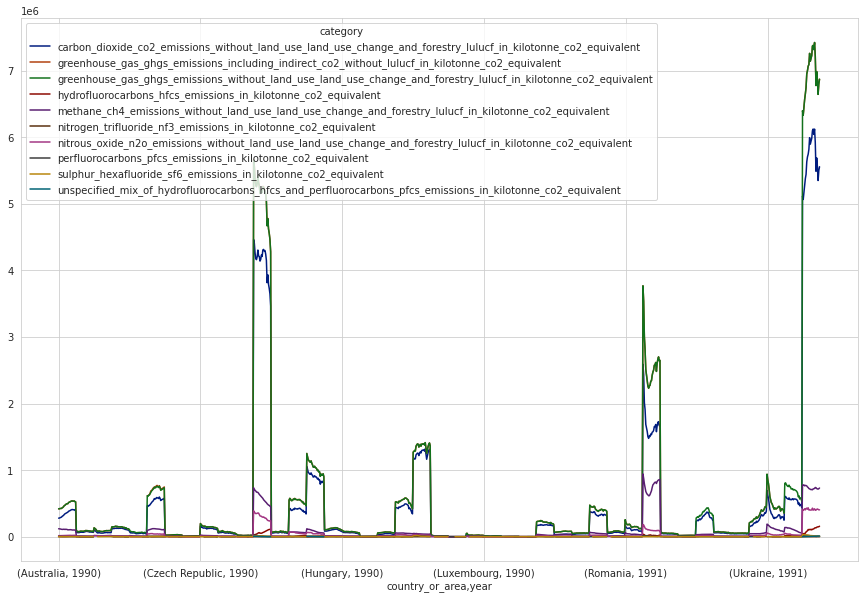

In [44]:
table.plot()

In [61]:
gasnames = table.columns.values
def country_plot(nameOfCountry):
    data = table.loc[nameOfCountry]
#     plt.plot(data)
#     plt.legend(gasnames)
#     plt.title(nameOfCountry)
    
    # I need something like the code below
    fig, ax = plt.subplots(1,1)
    
    ax.plot(data) # no need to plot anything, except for when you're analyzing the data
    ax.legend(gasnames)
    ax.title(nameOfCountry)
    
    return fig 

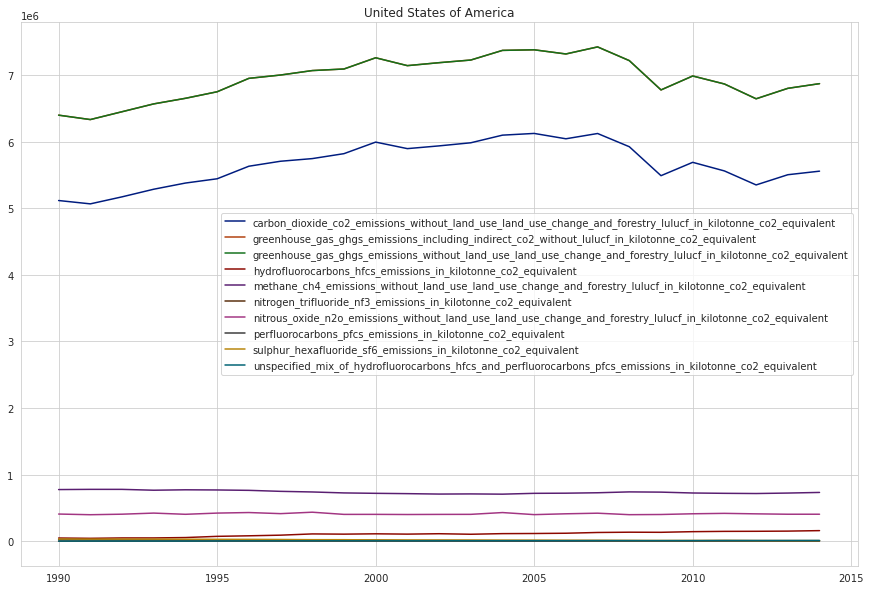

In [62]:
country_plot('United States of America')

In [38]:
def gascount():
    '''
    Same thing here. I need the figure that you get through figure, axes = plt.sublot(s)(int, int), 
    (if we're making the API that is) otherwise anything works
    '''
    
    plt.figure(figsize=(15,7))
    ax = sns.countplot(replaced_emission["category"])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right", fontsize=14)
    plt.tight_layout()
    plt.xlabel("Gas category",fontsize=16)
    plt.ylabel("Count",fontsize=16)
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.show()
    return gascount

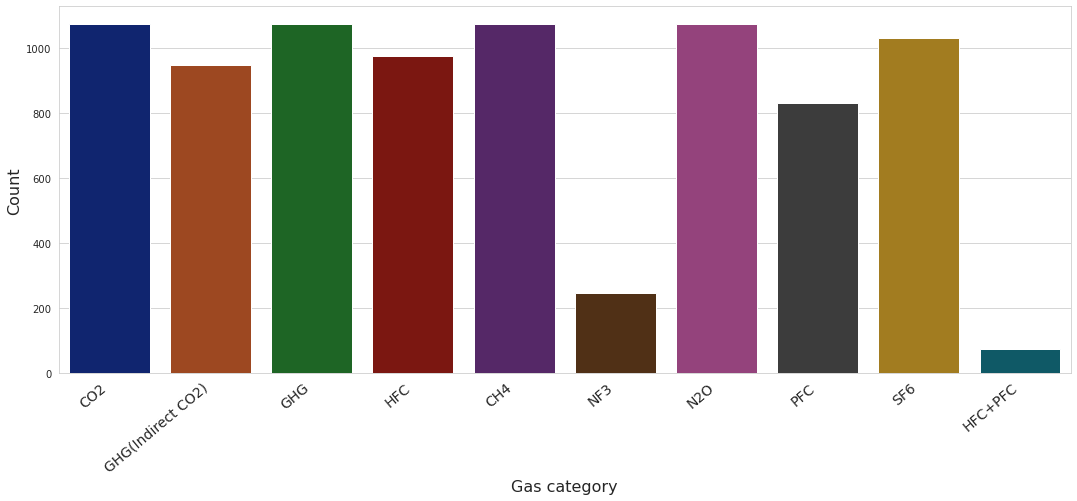

<function __main__.gascount()>

In [39]:
gascount()

**Conclusion -1**:
    The data iteself is very irregular interms of distribution and labels. *GHG(Indirect CO2)* is a part of CO2 data. Hence *CO2* is the most occuring Green House Gas. Also the *HFC*,*PFC* anf *HFC+PFC* data can be overlapped, but the exact proportion is unknown. *NF3* turns out to be occured the least. Also *GHG* has a undefined label, we can't say exactly how much proportion of other gases are present or some of them are not present while labeling the data.

### Calculating the Total amount of gases emitted 

In [40]:
loct = replaced_emission.groupby(['category'])['value'].sum()

In [67]:
replaced_emission['Total Emitted Gas'] = replaced_emission['value'].groupby(replaced_emission['category']).transform('sum')

In [68]:
loct.values

array([7.87271139e+07, 4.64020441e+08, 5.85188513e+08, 5.57452664e+08,
       7.27289194e+06, 2.44839942e+05, 3.21367507e+07, 2.81398722e+04,
       1.51517345e+06, 1.24316251e+06])

In [69]:
new_dataframe_emission = pd.DataFrame(loct.index)

In [70]:
new_dataframe_emission["Total Amount Emitted(In Kilotones)"] = loct.values

### Sorting the dataframe to know the amount

In [71]:
new_dataframe_emission.sort_values(by=['Total Amount Emitted(In Kilotones)'], inplace=True,ascending=False)

In [72]:
new_dataframe_emission

,category,Total Amount Emitted(In Kilotones)
2,GHG,5.851885e+08
3,GHG(Indirect CO2),5.574527e+08
1,CO2,4.640204e+08
0,CH4,7.872711e+07
6,N2O,3.213675e+07
4,HFC,7.272892e+06
8,PFC,1.515173e+06
9,SF6,1.243163e+06
5,HFC+PFC,2.448399e+05
7,NF3,2.813987e+04


**Conclusion - 2:**
    Yet another problem, *GHG* category has the maximum emitted amount, *CO2* and *indirect CO2*, sums up to make *CO2* maximum. *NF3* has the least emitted amount. 

In [73]:
replaced_emission.head()

,country_or_area,year,value,category,Total Emitted Gas
0,Australia,2014,393126.946994,CO2,4.640204e+08
1,Australia,2013,396913.936530,CO2,4.640204e+08
2,Australia,2012,406462.847704,CO2,4.640204e+08
3,Australia,2011,403705.528314,CO2,4.640204e+08
4,Australia,2010,406200.993184,CO2,4.640204e+08


In [84]:
Finland_data = replaced_emission[replaced_emission["country_or_area"]=="Finland"].groupby(["category","year"],as_index = False)

In [85]:
data_div = pd.pivot_table(replaced_emission,values="value",index = ["country_or_area", "year"],columns = ["category"])

In [86]:
data_div.head(10)

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   
                1995  109900.735111  305162.543549  433478.650826   
                1996  109185.337720  311914.819824  439803.962228   
                1997  111898.854749  320439.116819  451721.717815   
                1998  111427.929806  334328.142647  466382.112472   
                1999  107889.224971  343713.906948  472245.990778   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   
                1995  433478.650826      1004.032111 NaN       15578.196408   
                1996  439803.962228      414.170638  NaN       16609.586778   
                1997  451721.717815      705.228318  NaN       17201.890783   
                1998  466382.112472      998.289580  NaN       17743.913106   
                1999  472245.990778      1374.293110 NaN       17933.439790   

category              NF3          PFC         SF6  
country_or_area year                                
Australia       1990 NaN   4607.012919  211.018511  
                1991 NaN   4610.743294  228.944834  
                1992 NaN   4603.282544  246.858849  
                1993 NaN   3315.528376  264.759156  
                1994 NaN   2164.428749  282.640896  
                1995 NaN   1530.835665  302.307983  
                1996 NaN   1410.395058  269.652210  
                1997 NaN   1228.150898  248.476248  
                1998 NaN   1660.518820  223.318513  
                1999 NaN   1139.058757  196.067201

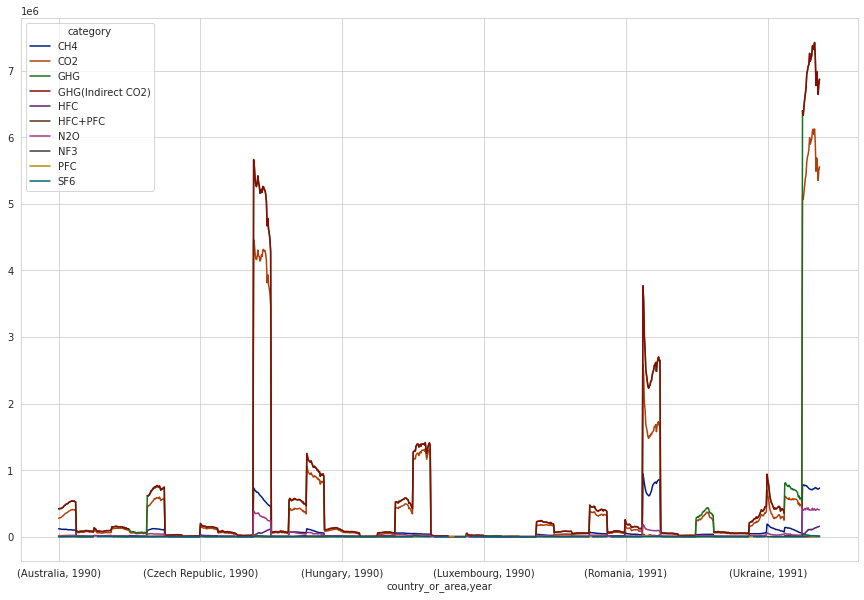

In [77]:
data_div.plot()

This doesn't depict the correct info and looks like a mess

### Plotting Country Wise

In [87]:
replaced_emission["country_or_area"].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [88]:
gases = data_div.columns.values

In [89]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

In [90]:
# lets define a function that can plot the country data 
def plot_the_country(name):
    find = data_div.loc[name]
    plt.plot(find)
    plt.legend(gases)
    plt.tick_params(labelsize=12)
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.xlim(2000,2014)

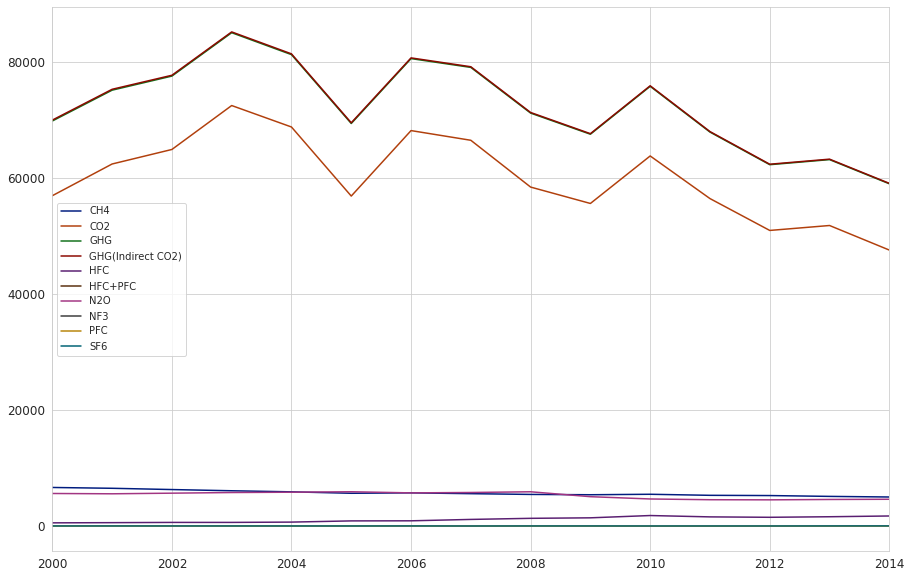

In [91]:
plot_the_country("Finland")

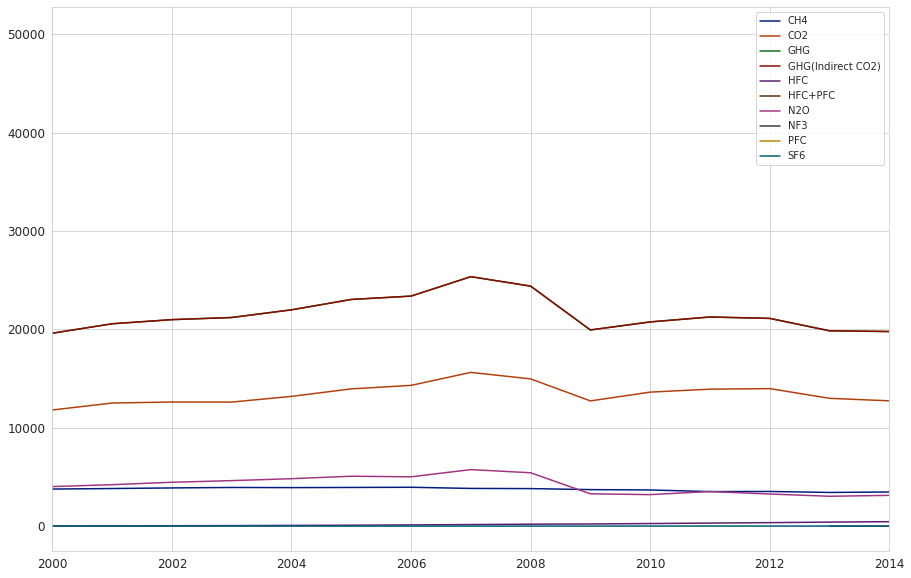

In [92]:
plot_the_country("Lithuania")

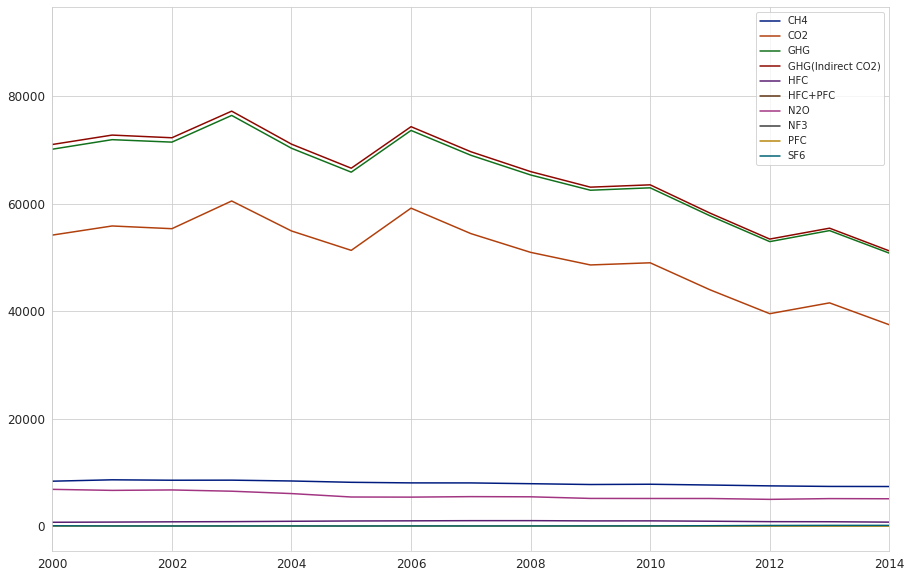

In [93]:
plot_the_country("Denmark")

May be after recession, **Denmark** had new laws on pollution control. There is a strong negative inclination.

Lets look at East-Asian countries

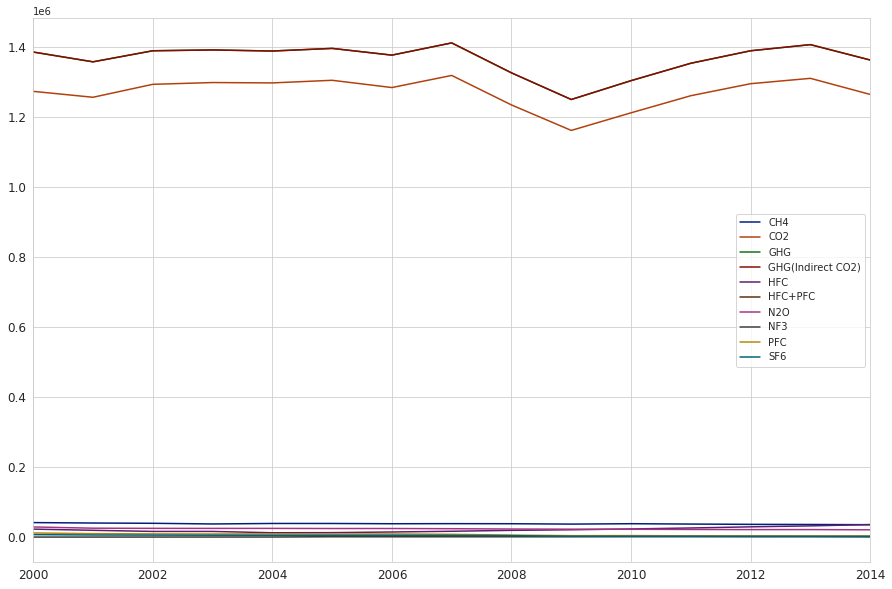

In [94]:
plot_the_country("Japan")

**Japan** had a decrease in CO2 emission during recession, may be they were affected the most or any new law arrived which reduced the purchasing power of their countymen. It requires more research.

**Conclusion-3** - We need to compare the emission data country wise instead of gas types,that can give us a better research output.

### Comparing Emission Data Country Wise

In [95]:
area_div = pd.pivot_table(replaced_emission, values='value', index=['category', 'year'], columns=['country_or_area'])
area_div.head(20)

country_or_area      Australia       Austria       Belarus       Belgium  \
category year                                                              
CH4      1990    118768.837813  10598.566361  17944.369142  12040.181048   
         1991    117744.641814  10462.096189  17258.134452  11999.377566   
         1992    116837.506726  10164.748677  16295.436192  11886.349715   
         1993    113837.511923  10073.833199  15583.113398  11838.303374   
         1994    110997.410185  9775.857792   14331.807083  11867.016600   
         1995    109900.735111  9674.049590   13611.075970  11947.638179   
         1996    109185.337720  9382.925634   13672.822022  11802.081834   
         1997    111898.854749  9011.517063   13578.265278  11689.898943   
         1998    111427.929806  8831.331453   13540.244709  11524.999684   
         1999    107889.224971  8645.176255   13212.462486  11265.277850   
         2000    111520.309552  8466.366071   12922.696280  10827.004563   
         2001    110301.733954  8284.300539   12799.025856  10386.252961   
         2002    108309.143528  8134.080336   12705.355450  9956.500859    
         2003    102574.207810  8061.205812   13734.631920  9372.468380    
         2004    103839.210857  8048.712308   14331.370196  9318.580720    
         2005    105887.562989  7809.615176   14727.060054  9074.769078    
         2006    104842.389866  7667.628872   15450.078576  8982.981926    
         2007    105174.667802  7543.052546   15646.793247  8947.755210    
         2008    103119.546054  7399.361705   16240.159788  8736.794244    
         2009    101886.833298  7294.264546   17118.031159  8668.573668    

country_or_area      Bulgaria         Canada      Croatia      Cyprus  \
category year                                                           
CH4      1990    16430.837565  95378.251942   3770.717761  693.566622   
         1991    15313.268855  97516.511686   3625.915742  704.355986   
         1992    14869.295993  101927.841563  3227.336089  733.570274   
         1993    13764.491319  105204.361167  3260.041563  761.678069   
         1994    12003.087341  108917.321071  3034.348436  773.175583   
         1995    12051.210562  113111.078283  2986.637175  797.533507   
         1996    11936.166516  116885.460266  2968.513006  819.083378   
         1997    11500.645277  118988.193048  2908.314030  826.651707   
         1998    10886.058568  120647.458345  2866.646554  830.270404   
         1999    10347.035078  120592.533777  2847.590855  831.090819   
         2000    10189.340058  120724.871831  2785.338223  847.453418   
         2001    9491.668896   119920.258788  2844.147841  887.602343   
         2002    9374.212548   117504.637071  2838.302617  921.251494   
         2003    10063.720369  116809.277477  2936.870511  917.705867   
         2004    9476.237783   117419.386087  3061.844195  914.712171   
         2005    8720.075935   116434.331258  3029.461752  894.249977   
         2006    8446.725322   115516.052739  3100.590412  894.042452   
         2007    8389.983299   113213.994031  3114.802057  915.518721   
         2008    8164.025188   110540.258265  3153.402762  919.096320   
         2009    7794.838368   106149.435213  3214.901483  921.274584   

country_or_area  Czech Republic      Denmark  ...  Russian Federation  \
category year                                 ...                       
CH4      1990    23315.046769    8082.707613  ...  942383.462118        
         1991    21607.175422    8279.662247  ...  875196.162997        
         1992    20139.159952    8364.646101  ...  794953.160990        
         1993    19226.589930    8570.915282  ...  737770.858519        
         1994    18086.829077    8437.693903  ...  680641.143638        
         1995    17744.942585    8497.613284  ...  655448.422294        
         1996    17564.912099    8608.320974  ...  637618.056003        
         1997    17105.079739    8506.801961  ...  627871.88965

In [96]:
countries = area_div.columns.values

In [97]:
def country_wise_plot(name):
    cname = area_div.loc[name]
    plt.plot(cname)
    plt.tick_params(labelsize=14)
    plt.legend(countries, loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 3)
    plt.rcParams["figure.figsize"] = [15, 10]

In [98]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

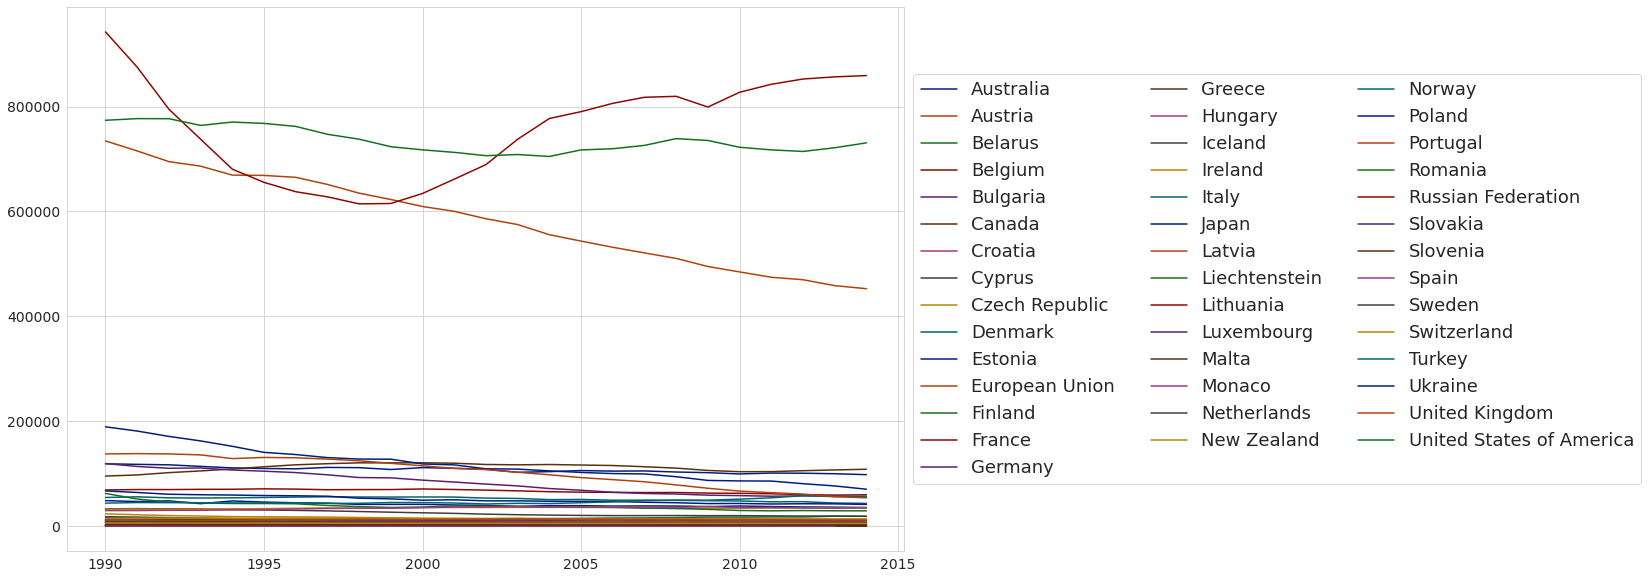

In [99]:
country_wise_plot(gases[0]) # this is too crowded. Maybe increase the image height?

Above plot is OK for rough estimation but not good for a better grasp, hence let's design something that can plot the selected countries on the same graph with the same context.

### Comparing Countries By Passing Required Series

In [100]:
def gas_accord_country1(gas_name, country_name):                          # years from 1990-2004
    data = area_div.loc[gas_name]
    data.plot( y = country_name)
    plt.legend(country_name,loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 2)
    plt.tick_params(labelsize=14)
    plt.xlabel("Year",fontsize=14)
    plt.xlim(1990,2004)
    plt.rcParams["figure.figsize"] = [15, 10]
    
def gas_accord_country2(gas_name, country_name):
    data = area_div.loc[gas_name]
    data.plot( y = country_name)
    plt.legend(country_name,loc = "center left",bbox_to_anchor=(1, 0.5),fontsize = 18,ncol = 2)
    plt.tick_params(labelsize=14)
    plt.xlabel("Year",fontsize=14)
    plt.xlim(2004,2017)
    plt.rcParams["figure.figsize"] = [15, 10]

In [101]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

In [102]:
countries_name = replaced_emission["country_or_area"].unique()

In [103]:
countries_name

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

## Analysing the data WRT gas name and country

### For Methane(CH4) emission:

#### 1. Country Set - 1 :

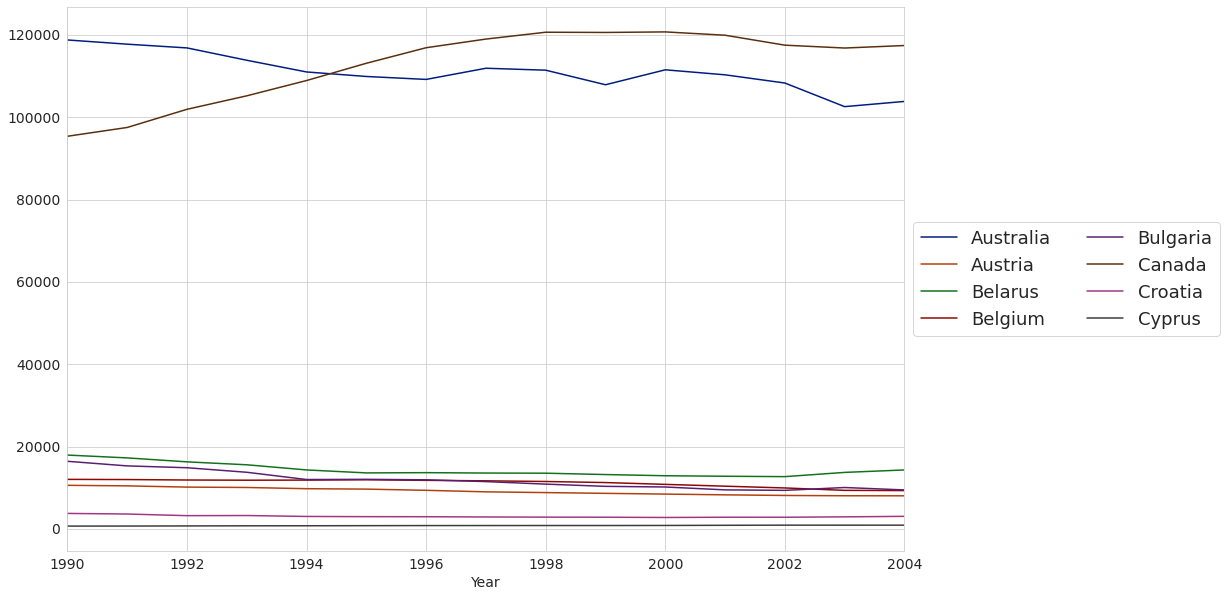

In [106]:
gas_accord_country1(gases[0],countries_name[:8])

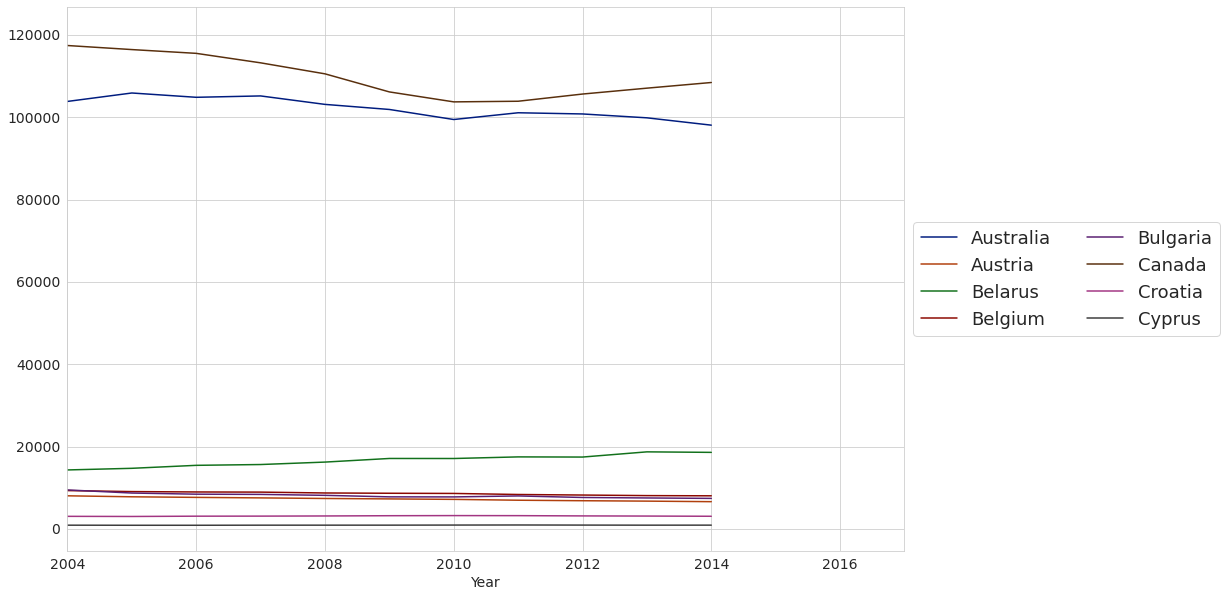

In [107]:
gas_accord_country2(gases[0],countries_name[:8])

#### 2. Country Set - 2 :

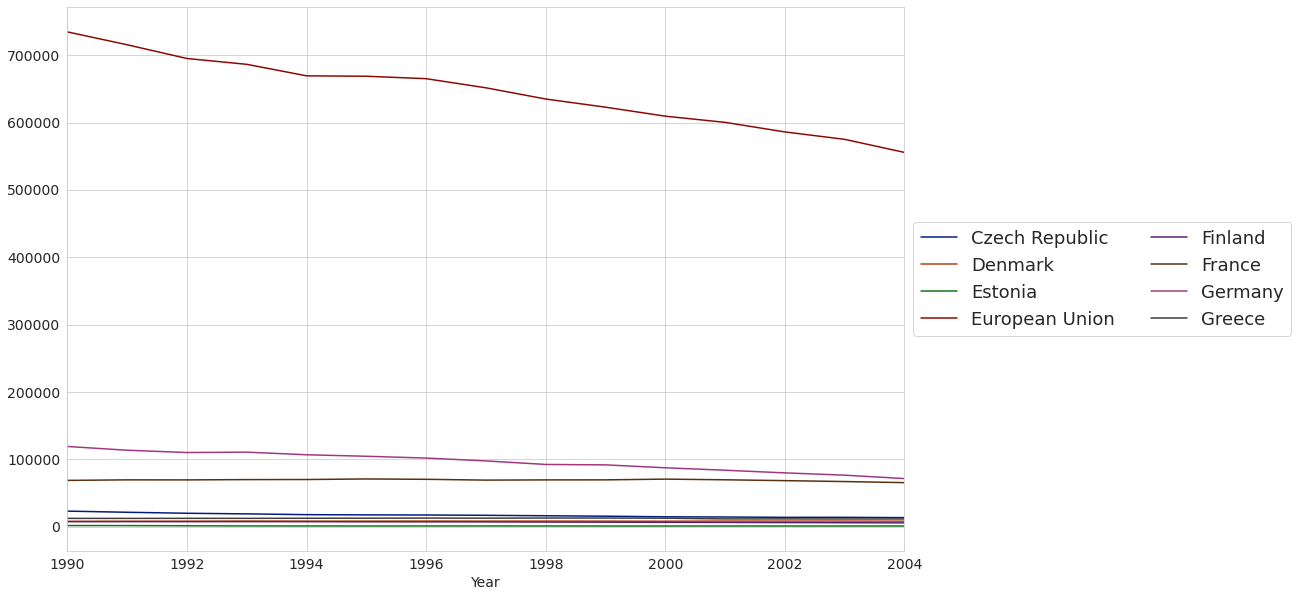

In [108]:
gas_accord_country1(gases[0],countries_name[8:16])

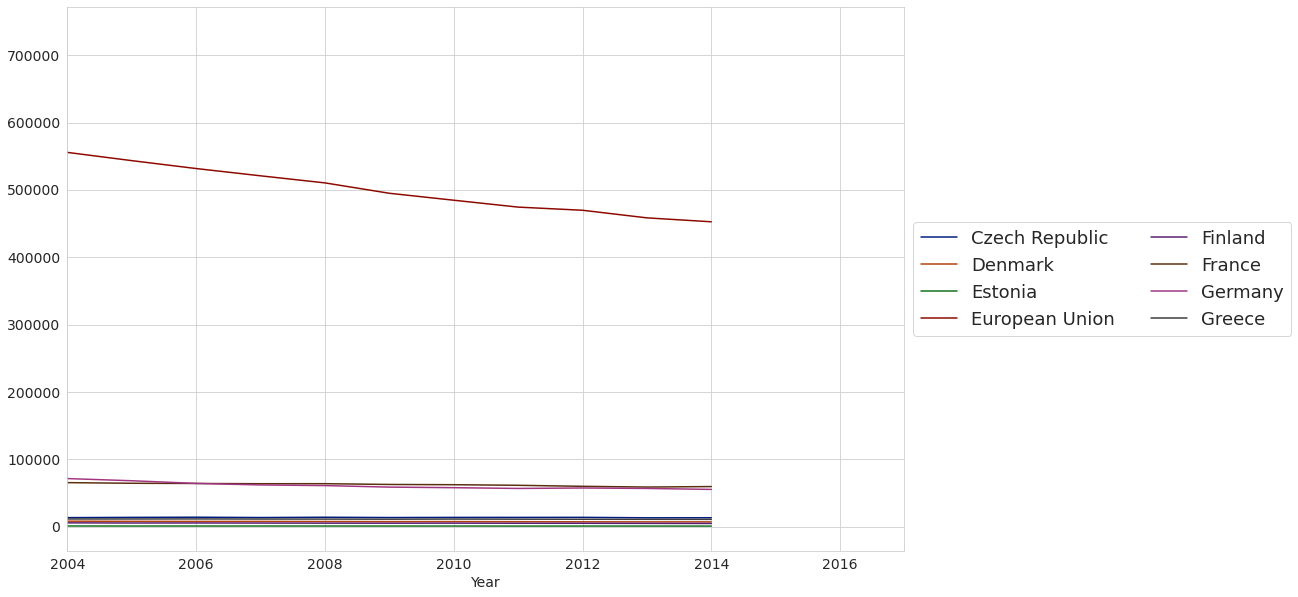

In [109]:
gas_accord_country2(gases[0],countries_name[8:16])

#### 3. Country Set - 3 :

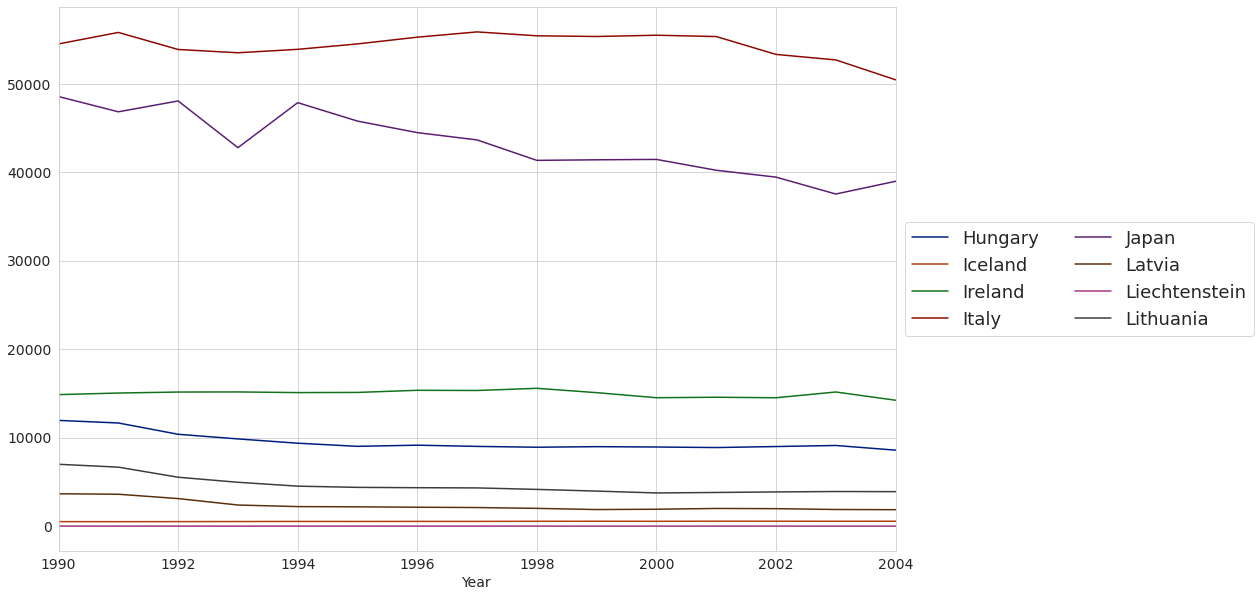

In [110]:
gas_accord_country1(gases[0],countries_name[16:24])

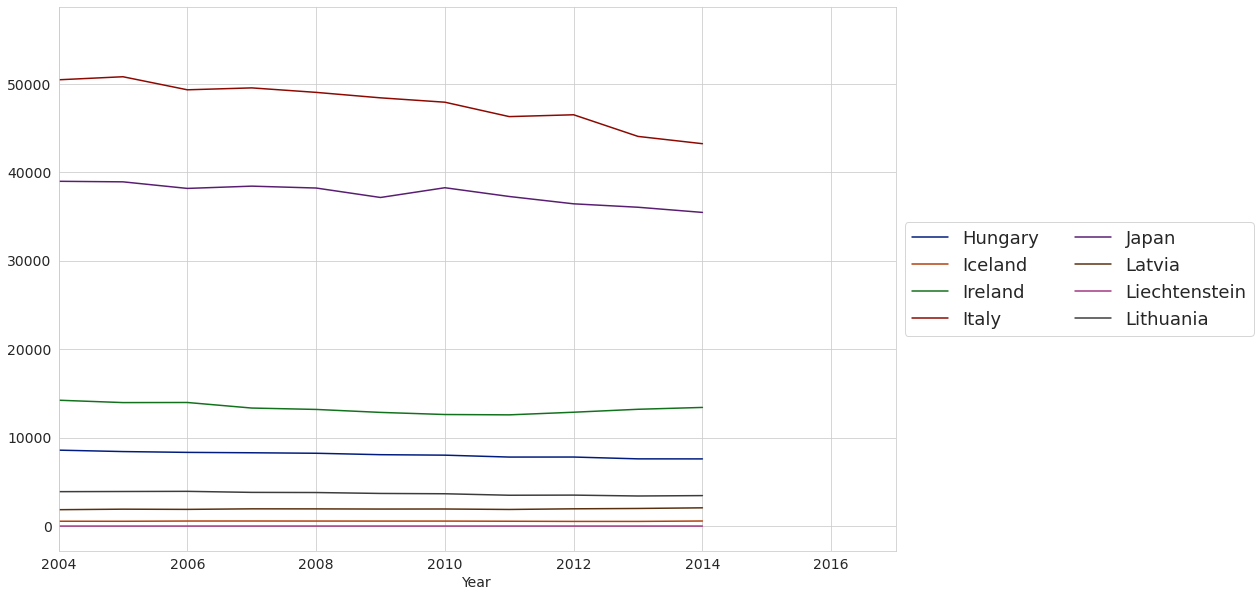

In [111]:
gas_accord_country2(gases[0],countries_name[16:24])

#### 3. Country Set - 4 :

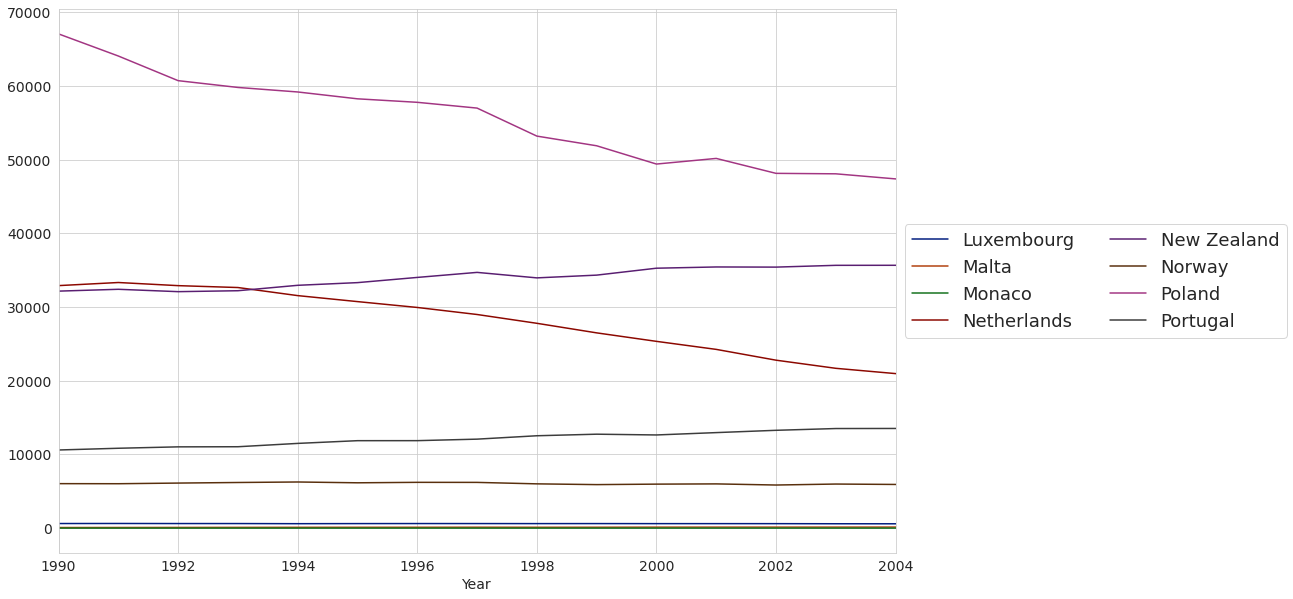

In [112]:
gas_accord_country1(gases[0],countries_name[24:32])

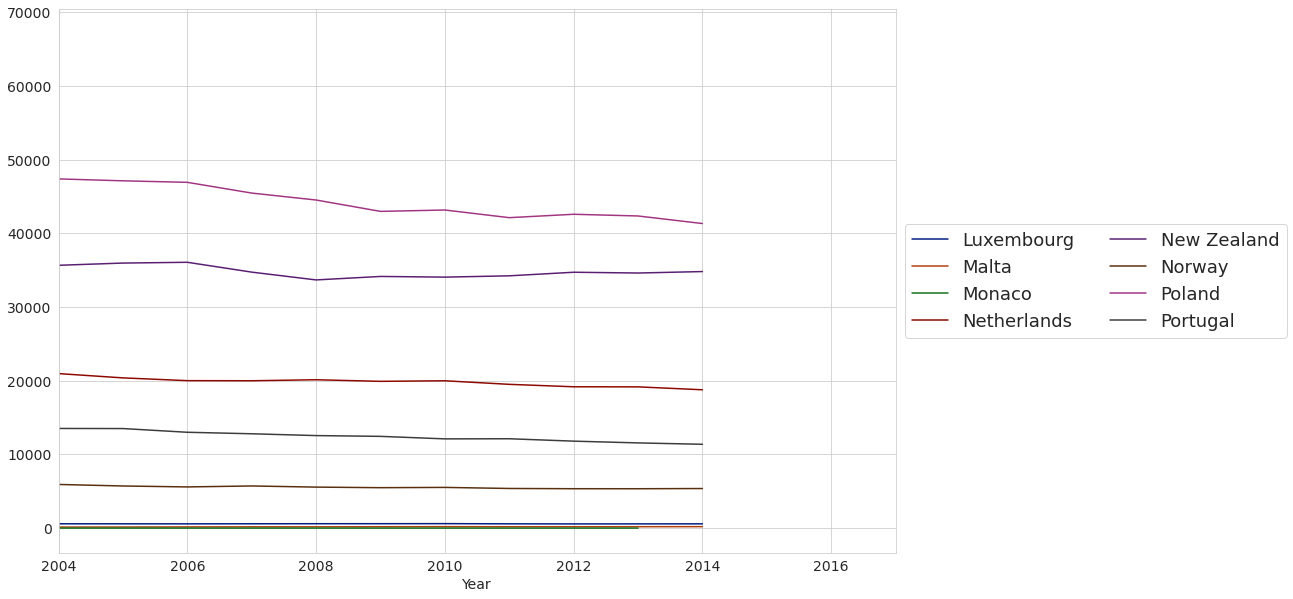

In [113]:
gas_accord_country2(gases[0],countries_name[24:32])

#### 4. Country Set - 4

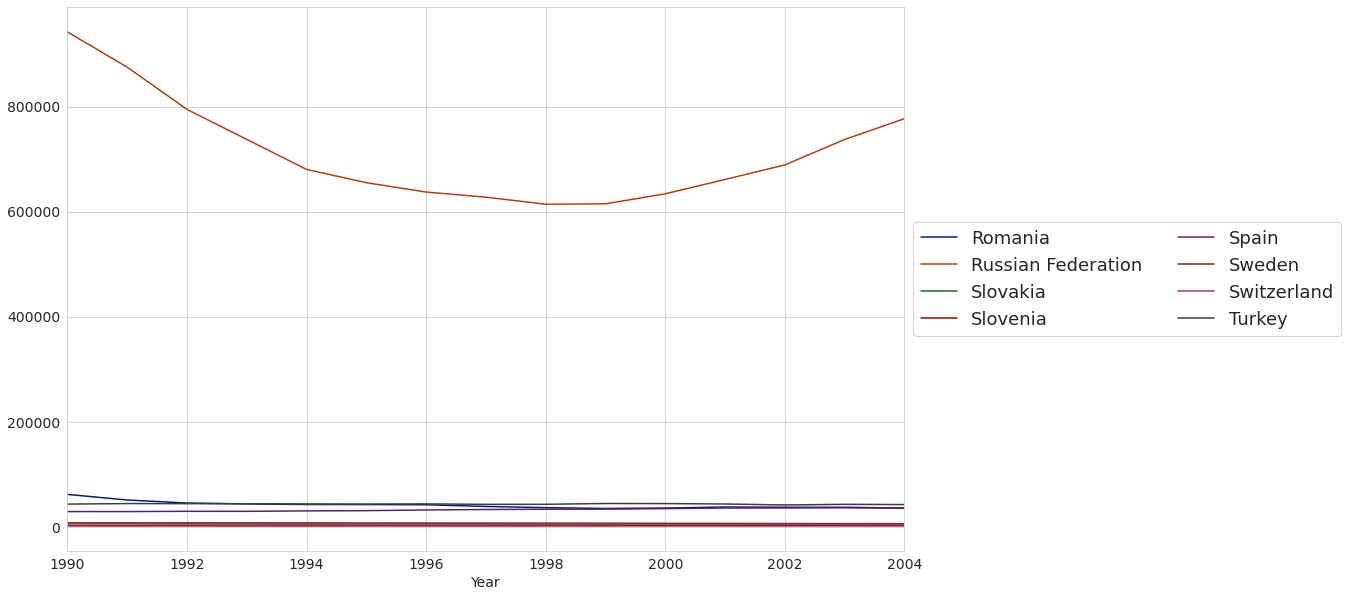

In [114]:
gas_accord_country1(gases[0],countries_name[32:40])

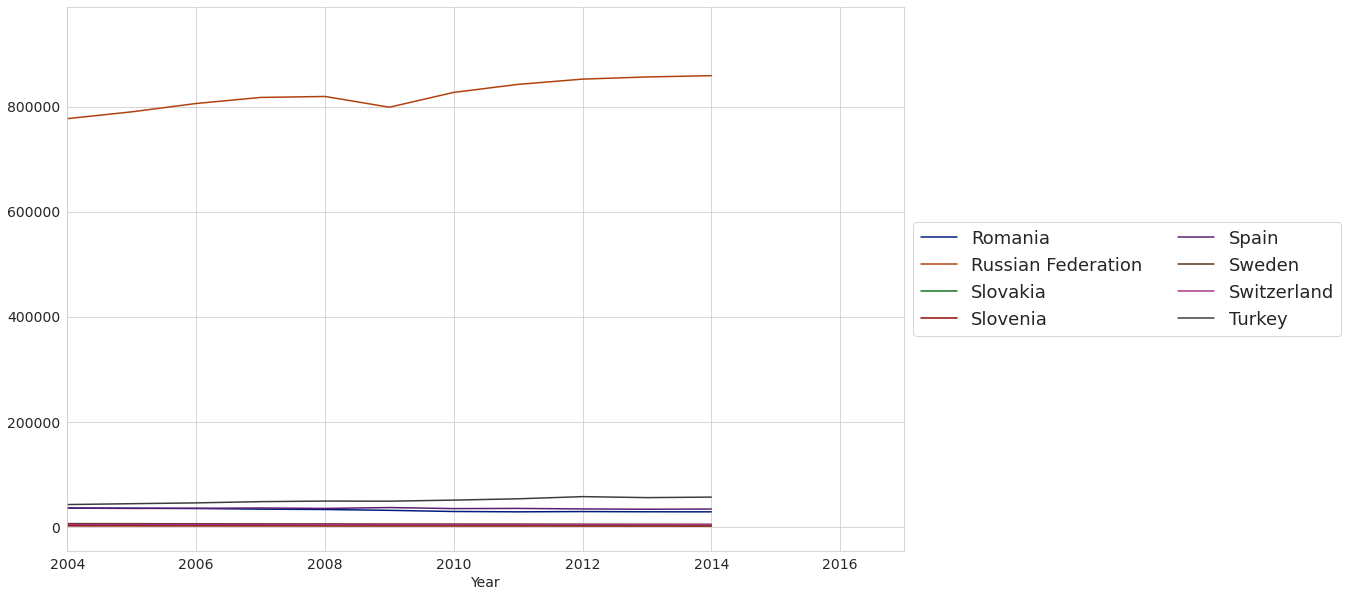

In [115]:
gas_accord_country2(gases[0],countries_name[32:40])

#### 5. Final Set -

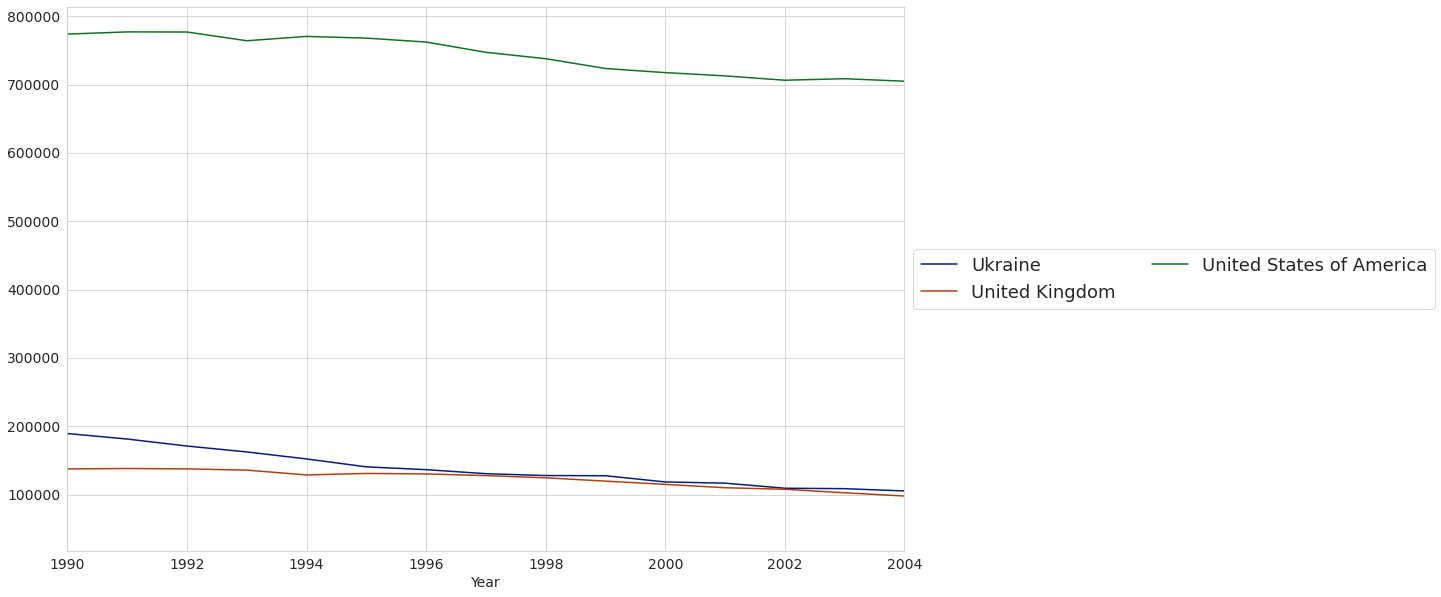

In [116]:
gas_accord_country1(gases[0],countries_name[40:43])

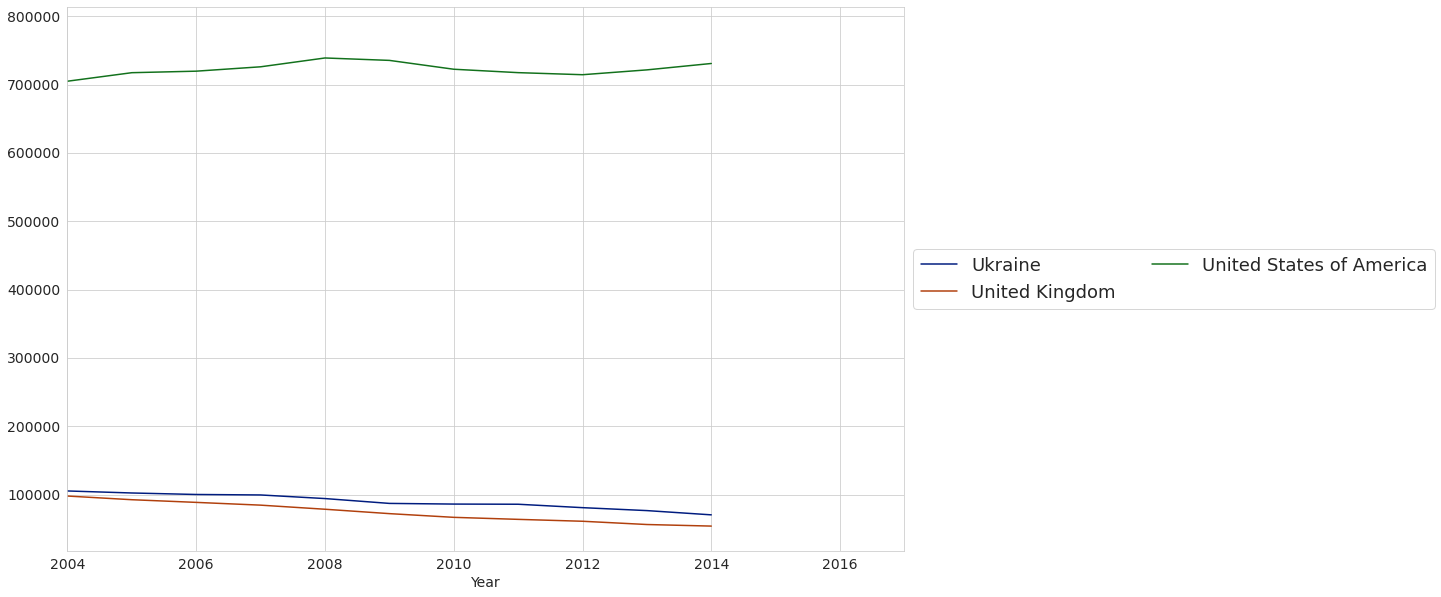

In [117]:
gas_accord_country2(gases[0],countries_name[40:43])

In [118]:
data_div.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   

category              NF3          PFC         SF6  
country_or_area year                                
Australia       1990 NaN   4607.012919  211.018511  
                1991 NaN   4610.743294  228.944834  
                1992 NaN   4603.282544  246.858849  
                1993 NaN   3315.528376  264.759156  
                1994 NaN   2164.428749  282.640896

### Cleaning the GHG & GHG(Indirect CO2) column

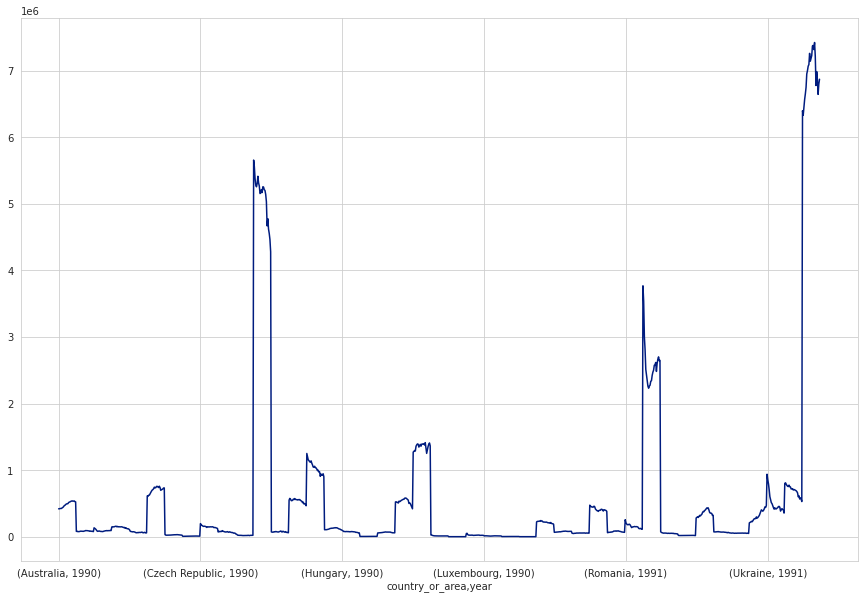

In [119]:
data_div["GHG"].plot()

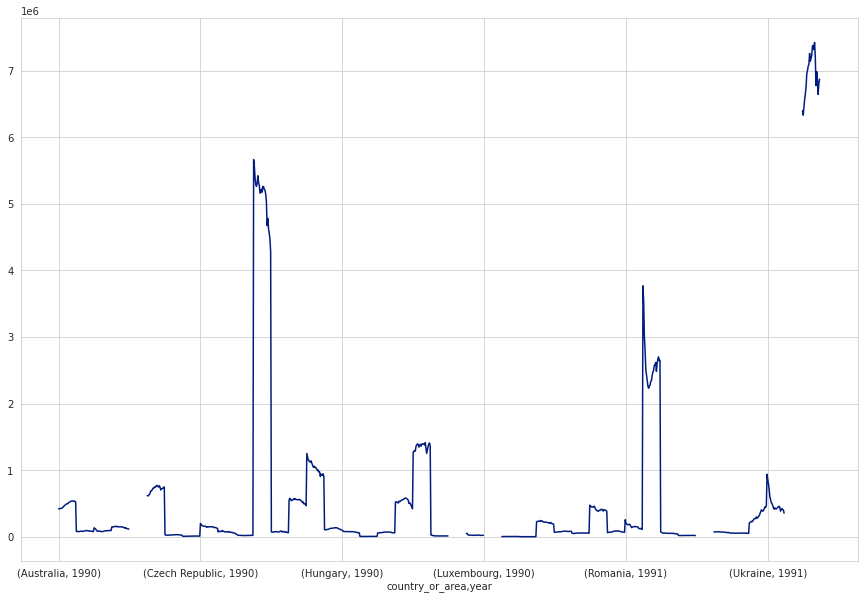

In [120]:
data_div["GHG(Indirect CO2)"].plot()

It seems like **GHG(Indirect CO2)** has NaN data and it's discontinuous. Also the above plots depict that both the column are almost similar, lets check if there is any dissimilarity.

In [121]:
cleaned_data = data_div

In [122]:
cleaned_data.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   

category              NF3          PFC         SF6  
country_or_area year                                
Australia       1990 NaN   4607.012919  211.018511  
                1991 NaN   4610.743294  228.944834  
                1992 NaN   4603.282544  246.858849  
                1993 NaN   3315.528376  264.759156  
                1994 NaN   2164.428749  282.640896

In [123]:
cleaned_data["Check"] = cleaned_data["GHG"] - cleaned_data["GHG(Indirect CO2)"]

In [124]:
cleaned_data.head()

category                        CH4            CO2            GHG  \
country_or_area year                                                
Australia       1990  118768.837813  278265.898941  418623.049563   
                1991  117744.641814  279741.639012  418674.057494   
                1992  116837.506726  284766.092718  423080.108191   
                1993  113837.511923  289142.267681  423764.932564   
                1994  110997.410185  293830.709141  424092.959373   

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Australia       1990  418623.049563      1424.683520 NaN       15345.597858   
                1991  418674.057494      1424.683520 NaN       14923.405021   
                1992  423080.108191      1333.184000 NaN       15293.183355   
                1993  423764.932564      1829.872000 NaN       15374.993428   
                1994  424092.959373      1027.343549 NaN       15790.426852   

category              NF3          PFC         SF6  Check  
country_or_area year                                       
Australia       1990 NaN   4607.012919  211.018511  0.0    
                1991 NaN   4610.743294  228.944834  0.0    
                1992 NaN   4603.282544  246.858849  0.0    
                1993 NaN   3315.528376  264.759156  0.0    
                1994 NaN   2164.428749  282.640896  0.0

In [125]:
cleaned_data[(cleaned_data["Check"] !=0) & (cleaned_data["Check"] < 0)]

category                        CH4            CO2            GHG  \
country_or_area year                                                
Canada          1990  95378.251942   463493.332388  612866.051520   
                1991  97516.511686   454246.137946  605548.115938   
                1992  101927.841563  468546.458912  622763.761066   
                1993  105204.361167  467607.237235  624641.473382   
                1994  108917.321071  482691.671272  646008.211067   
...                             ...            ...            ...   
Switzerland     2010  5271.579520    45027.064480   54373.081962    
                2011  5206.270747    40973.149167   50296.296816    
                2012  5164.955710    42241.553605   51637.521590    
                2013  5095.049360    43181.659440   52519.985629    
                2014  5095.069284    39265.052592   48617.080740    

category              GHG(Indirect CO2)          HFC  HFC+PFC           N2O  \
country_or_area year                                                          
Canada          1990  616908.110877      970.584000  NaN       42239.730772   
                1991  611861.129270      1056.720000 NaN       41010.074066   
                1992  625134.003493      829.836000  NaN       41323.517716   
                1993  631353.636877     NaN          NaN       42000.445644   
                1994  652999.137827     NaN          NaN       45062.170191   
...                             ...      ..           ..                ...   
Switzerland     2010  54498.086338       1329.364549 NaN       2524.077450    
                2011  50420.474372       1410.149496 NaN       2473.198523    
                2012  51759.672142       1489.046425 NaN       2461.363240    
                2013  52641.217810       1513.188896 NaN       2425.572882    
                2014  48737.866661       1500.979852 NaN       2452.849492    

category                   NF3          PFC          SF6        Check  
country_or_area year                                                   
Canada          1990  0.324454  7557.901859  3225.926105 -4042.059357  
                1991  0.315784  8033.113215  3685.243241 -6313.013332  
                1992  0.307113  7578.683113  2557.116649 -2370.242427  
                1993  0.298443  7455.583436  2373.547457 -6712.163495  
                1994  0.289772  6895.014542  2441.744218 -6990.926760  
...                        ...          ...          ...          ...  
Switzerland     2010  8.453287  64.567514    147.975161  -125.004376   
                2011  6.218316  67.776071    159.534496  -124.177555   
                2012  0.361628  71.326589    208.914393  -122.150552   
                2013  0.094784  51.963019    252.457249  -121.232181   
                2014  0.403587  43.883614    258.842320  -120.785921   

[275 rows x 11 columns]

 So there are 275 rows who has a differenc of **GHG** and **GHG(Indirect CO2)** column. So we can safely drop the **GHG(Indirect CO2) column**.

In [126]:
cleaned_data = cleaned_data.drop("GHG(Indirect CO2)",axis = 1)

In [127]:
cleaned_data = cleaned_data.drop("Check",axis = 1)

### Checking the "HFC+PFC" Column 

In [128]:
cleaned_data["HFC+PFC"].isnull().sum()

999

In [129]:
Regular_data = cleaned_data[cleaned_data["HFC+PFC"].isnull()==False]
len(Regular_data)

75

So the conclusion is **HFC+PFC** column has only 75 values which are not nulls.

In [130]:
Regular_data = Regular_data.reset_index()

In [131]:
Regular_data.head(10)

category,country_or_area,year,CH4,CO2,GHG,HFC,HFC+PFC,N2O,NF3,PFC,SF6
0,European Union,1990,734491.057034,4.462205e+06,5.656504e+06,29125.636300,5705.723894,388663.460586,23.775890,25369.662019,10919.699659
1,European Union,1991,715378.704916,4.403723e+06,5.558237e+06,29148.253055,5236.723320,370242.088936,25.486229,23023.080380,11459.057988
2,European Union,1992,695017.254203,4.259923e+06,5.378841e+06,31563.920261,5222.149630,355959.767869,27.370715,18844.424042,12282.827908
3,European Union,1993,686376.821938,4.177107e+06,5.279951e+06,34486.617159,5215.637160,345876.471393,29.447229,17891.051869,12968.382049
4,European Union,1994,669301.263462,4.161321e+06,5.255114e+06,39125.646161,5487.385110,348484.822972,32.494030,17217.942090,14142.844872
5,European Union,1995,668698.051517,4.204481e+06,5.306108e+06,43748.978742,5773.246762,351343.564079,43.481084,16805.540057,15214.529485
6,European Union,1996,665079.336733,4.304793e+06,5.413300e+06,50862.683324,4324.621056,356924.647677,69.420645,16147.636847,15098.003771
7,European Union,1997,651528.738611,4.216525e+06,5.313562e+06,58699.699209,4208.604376,353901.179362,103.422375,14975.287478,13620.341702
8,European Union,1998,634900.160180,4.207666e+06,5.265846e+06,60079.904751,4108.460476,331944.081021,116.818674,14155.142661,12875.110913
9,European Union,1999,622775.452019,4.139003e+06,5.153485e+06,51748.841340,3947.177534,311617.795637,60.790961,13770.439811,10561.358463


In [132]:
Regular_data.groupby("country_or_area").count()

category,year,CH4,CO2,GHG,HFC,HFC+PFC,N2O,NF3,PFC,SF6
country_or_area,,,,,,,,,,
European Union,25,25,25,25,25,25,25,25,25,25
Germany,25,25,25,25,25,25,25,25,25,25
United States of America,25,25,25,25,25,25,25,25,25,25


As we can see, the dataset has data for only for three countries

In [133]:
gases

array(['CH4', 'CO2', 'GHG', 'GHG(Indirect CO2)', 'HFC', 'HFC+PFC', 'N2O',
       'NF3', 'PFC', 'SF6'], dtype=object)

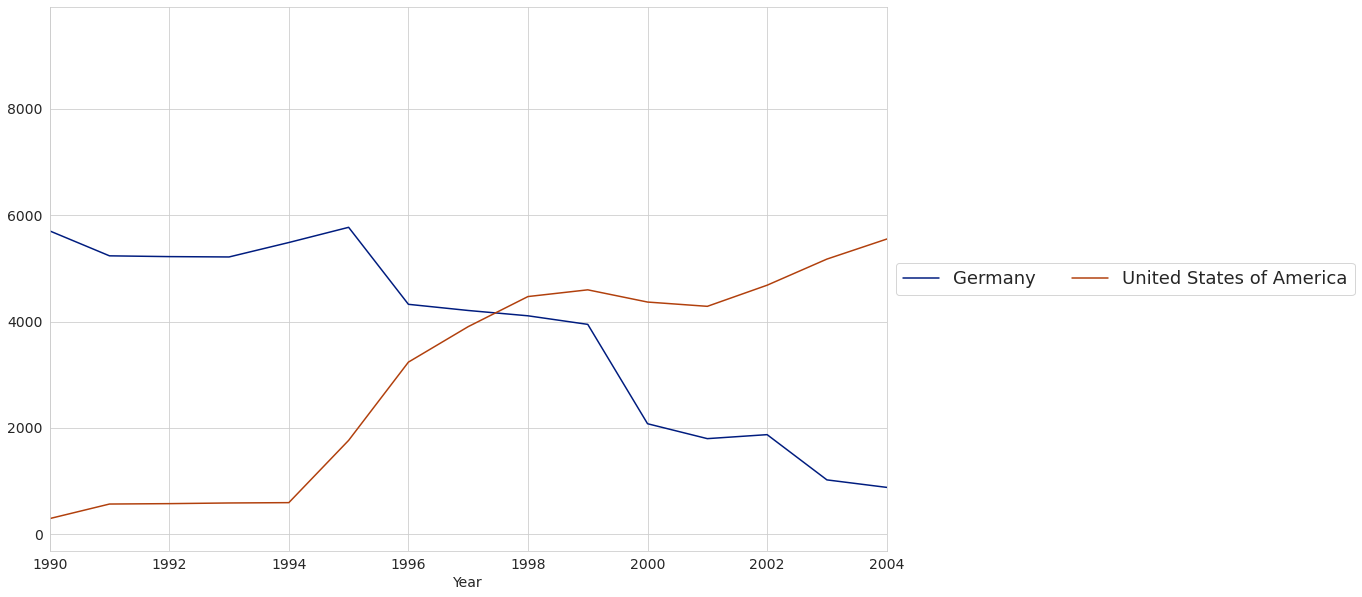

In [134]:
gas_accord_country1(gases[5],["Germany","United States of America"])

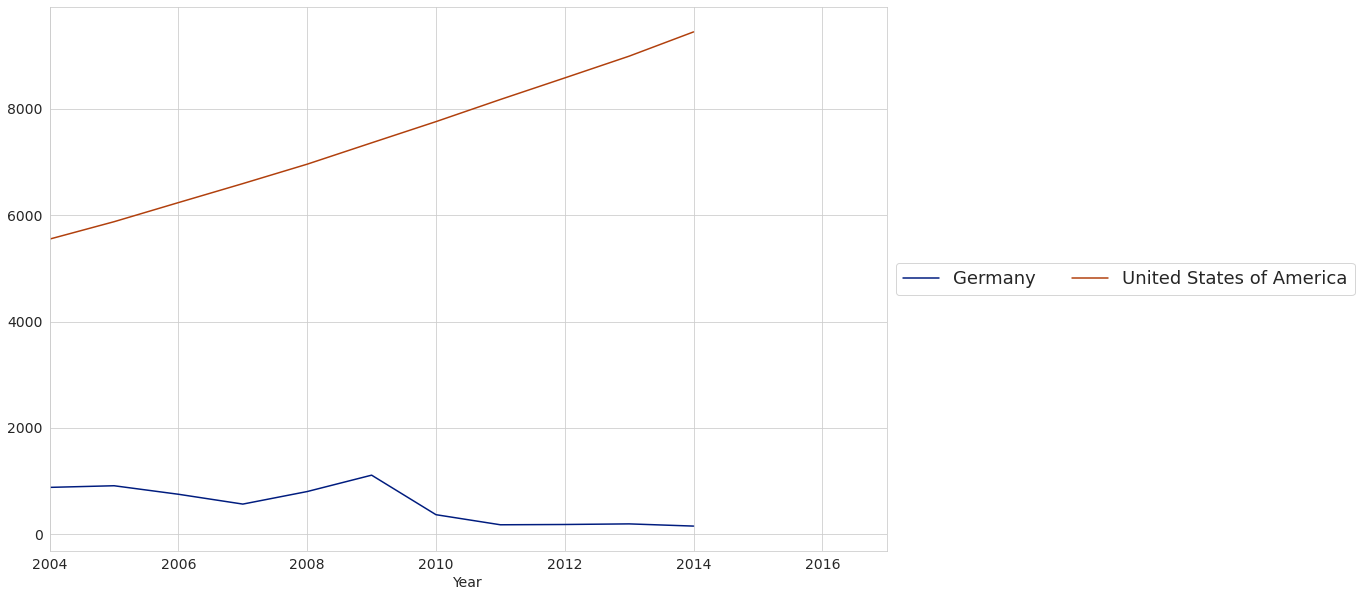

In [135]:
gas_accord_country2(gases[5],["Germany","United States of America"])

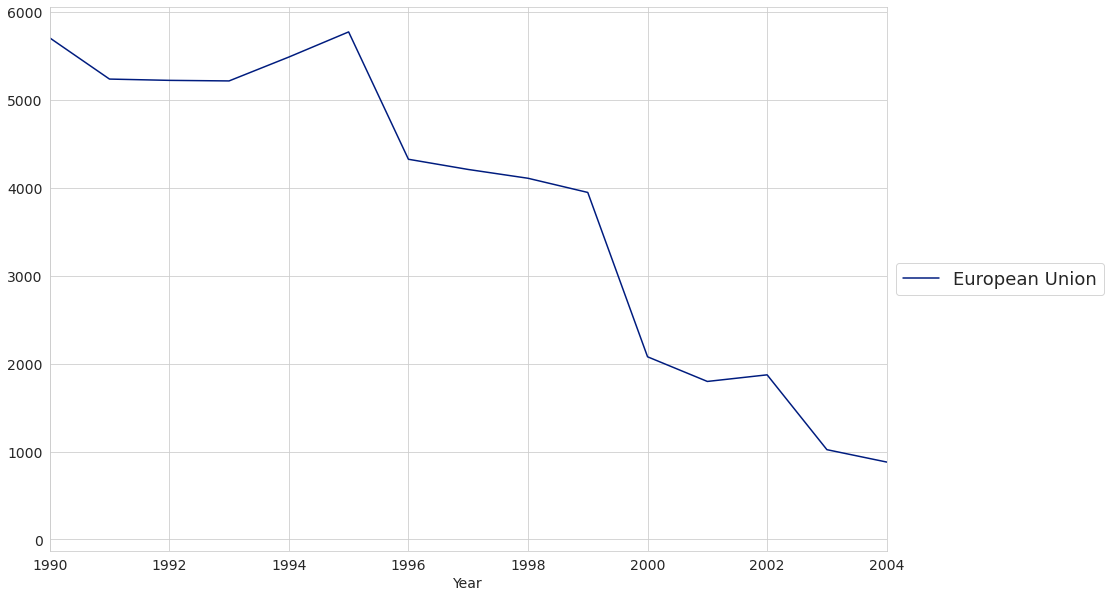

In [136]:
gas_accord_country1(gases[5],["European Union"])

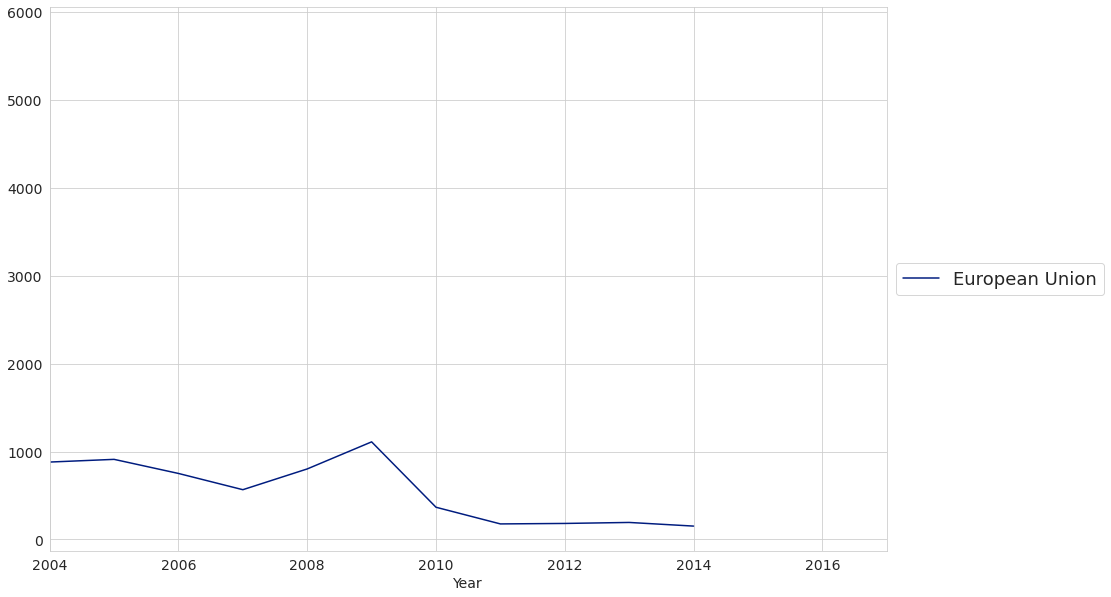

In [137]:
gas_accord_country2(gases[5],["European Union"])

### Analysing the HFC and PFC column

#### HFC

In [ ]:
gases

In [ ]:
cleaned_data.head()

In [ ]:
countries_name

In [ ]:
cleaned_data[cleaned_data["HFC"].isnull()==True]

As we can see 99 rows have Nan values in their HFC column, hence we can ignore them during our analysis

In [ ]:
gas_accord_country1(gases[4],countries_name[:10])

In [ ]:
gas_accord_country2(gases[4],countries_name[:10])

In [ ]:
gas_accord_country1(gases[4],countries_name[10:20])

In [ ]:
gas_accord_country2(gases[4],countries_name[10:20])

In [ ]:
gas_accord_country1(gases[4],countries_name[20:30])

In [ ]:
gas_accord_country2(gases[4],countries_name[20:30])

In [ ]:
gas_accord_country1(gases[4],countries_name[30:40])

In [ ]:
gas_accord_country2(gases[4],countries_name[30:40])

In [ ]:
gas_accord_country1(gases[4],countries_name[40:])

In [ ]:
gas_accord_country2(gases[4],countries_name[40:])

#### PFC

In [ ]:
cleaned_data[cleaned_data["PFC"].isnull()==True]

Around 20% data is not available in **PFC** column, It's a big irregularity, but still anaysis and an approximation can be done from the remaining 80% of the data.

In [ ]:
gas_accord_country1(gases[8],countries_name[10:20])

In [ ]:
gas_accord_country2(gases[8],countries_name[10:20])

In [ ]:
gas_accord_country1(gases[8],countries_name[20:30])

In [ ]:
gas_accord_country2(gases[8],countries_name[20:30])

In [ ]:
gas_accord_country1(gases[8],countries_name[30:40])

In [ ]:
gas_accord_country2(gases[8],countries_name[30:40])

In [ ]:
gas_accord_country1(gases[8],countries_name[40:43])

In [ ]:
gas_accord_country2(gases[8],countries_name[40:43])

### Analysing the NF3 column

In [ ]:
cleaned_data[cleaned_data["NF3"].isnull()==False]

Only **248** rows are having a **not Null** value in **NF3** column, which depicts the unavailability of the data, hecne we are going to create another dataframe object that has not Null data in NF3 column and we will use that for the analysis purpose.

In [ ]:
nf3_data = cleaned_data[cleaned_data["NF3"].isnull()==False].reset_index()

In [ ]:
nf3_data.groupby("country_or_area").count()

In [ ]:
nf3_countries = nf3_data.groupby("country_or_area").count().index

In [ ]:
nf3_countries

In [ ]:
gas_accord_country1(gases[7],nf3_countries)

### Analysing the SF6 column 

In [ ]:
len(cleaned_data[cleaned_data["SF6"].isnull()==True])

As we can see only a small chunk of data has Null value in the SF6 column, we can safely plot the data and analyse it.

In [ ]:
gas_accord_country1(gases[9],countries_name[:10])

In [ ]:
gas_accord_country2(gases[9],countries_name[:10])

In [ ]:
gas_accord_country1(gases[9],countries_name[10:20])

In [ ]:
gas_accord_country2(gases[9],countries_name[10:20])

In [ ]:
gas_accord_country1(gases[9],countries_name[20:30])

In [ ]:
gas_accord_country2(gases[9],countries_name[20:30])

In [ ]:
gas_accord_country1(gases[9],countries_name[30:40])

In [ ]:
gas_accord_country2(gases[9],countries_name[30:40])

In [ ]:
gas_accord_country1(gases[9],countries_name[40:])

In [ ]:
gas_accord_country2(gases[9],countries_name[40:])

### Analysing the N2O Column

In [ ]:
gases

In [ ]:
len(cleaned_data[cleaned_data["N2O"].isnull()==True])

In [ ]:
gas_accord_country1(gases[6],countries_name[:10])

In [ ]:
gas_accord_country2(gases[6],countries_name[:10])

In [ ]:
gas_accord_country1(gases[6],countries_name[10:20])

In [ ]:
gas_accord_country2(gases[6],countries_name[10:20])

In [ ]:
gas_accord_country1(gases[6],countries_name[20:30])

In [ ]:
gas_accord_country2(gases[6],countries_name[20:30])

In [ ]:
gas_accord_country1(gases[6],countries_name[30:40])

In [ ]:
gas_accord_country2(gases[6],countries_name[30:40])

In [ ]:
gas_accord_country1(gases[6],countries_name[40:43])

In [ ]:
gas_accord_country2(gases[6],countries_name[40:50])

### Analysing CO2 and GHG emission

In [ ]:
len(cleaned_data[cleaned_data["GHG"].isnull()==True])

In [ ]:
gases

In [ ]:
gas_accord_country1(gases[1],countries_name[:5])

In [ ]:
gas_accord_country1(gases[2],countries_name[:5])

In [ ]:
cleaned_data.head()

In [ ]:
cleaned_data["difference"] = cleaned_data["GHG"] - cleaned_data["CO2"]

In [ ]:
cleaned_data.head()

In [ ]:
gas_accord_country2(gases[1],countries_name[:5])

In [ ]:
gas_accord_country1(gases[1],countries_name[5:10])

In [ ]:
gas_accord_country2(gases[1],countries_name[5:10])

In [ ]:
gas_accord_country1(gases[1],countries_name[10:15])

In [ ]:
gas_accord_country2(gases[1],countries_name[10:15])

In [ ]:
gas_accord_country1(gases[1],countries_name[15:25])

In [ ]:
gas_accord_country2(gases[1],countries_name[15:25])

In [ ]:
gas_accord_country1(gases[1],countries_name[25:30])

In [ ]:
gas_accord_country2(gases[1],countries_name[25:30])

In [ ]:
gas_accord_country1(gases[1],countries_name[30:35])

In [ ]:
gas_accord_country2(gases[1],countries_name[30:35])

In [ ]:
gas_accord_country1(gases[1],countries_name[35:40])

In [ ]:
gas_accord_country2(gases[1],countries_name[35:40])

In [ ]:
gas_accord_country1(gases[1],countries_name[40:43])

In [ ]:
gas_accord_country2(gases[1],countries_name[40:43])

**GHG** will give a similar plot as of above with different range values in x and y axis, so analysis will be focused on some countries having high GHG emission.

In [ ]:
new_table = pd.pivot_table(replaced_emission, values='value',index=['category'],columns=['country_or_area'])

In [ ]:
new_table

In [ ]:
clean_new_table = new_table.fillna(0)

In [ ]:
clean_new_table['Australia'].index

In [ ]:
clean_new_table = clean_new_table.reset_index()

In [ ]:
clean_new_table['Australia']

In [ ]:
clean_new_table = clean_new_table.drop(clean_new_table.index[[2,3]])

### Checking Gas Emissions in a country

Let's define a function, that can check for the plot WRT the country name passed.

In [ ]:
def check_country(name):
    clean_new_table.plot(x = 'category', y = name)
    plt.tick_params(labelsize=14)
    plt.xlabel("Category Of GreenHouse Gases",fontsize=14)
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.legend(fontsize = 20)

In [ ]:
def tabulation_new(name):
    point = clean_new_table[name].sum()
    data_storage = clean_new_table[['category',name]]
    data_storage['Percent'] = (data_storage[name]/point * 100)
    print(data_storage)

#### Checking the plot with the country names

In [ ]:
clean_new_table.columns

In [ ]:
check_country('Australia')

In [ ]:
tabulation_new('Australia')

In [ ]:
check_country('Belgium')

In [ ]:
tabulation_new('Belgium')

In [ ]:
check_country('Canada')

In [ ]:
tabulation_new('Canada')

In [ ]:
check_country('European Union')

In [ ]:
tabulation_new('European Union')

In [ ]:
check_country('France')

In [ ]:
tabulation_new('France')

In [ ]:
check_country('Germany')

In [ ]:
tabulation_new('Germany')

In [ ]:
check_country('Italy')

In [ ]:
tabulation_new('Canada')

In [ ]:
check_country('Japan')

In [ ]:
tabulation_new('Japan')

In [ ]:
check_country('New Zealand')

In [ ]:
tabulation_new('New Zealand')

In [ ]:
check_country('Norway')

In [ ]:
tabulation_new('Norway')

In [ ]:
clean_new_table.columns

In [ ]:
check_country('Russian Federation')

In [ ]:
tabulation_new('Russian Federation')

### Top 10 countries responsible for GHG Emission

In [ ]:
clean_new_table

In [ ]:
new_table2 = pd.pivot_table(replaced_emission, values='value',index=['country_or_area'],columns=['category'])

In [ ]:
new_table2 = new_table2.fillna(0)

In [ ]:
sum_of_total_emission = new_table2.sum(axis=1)

In [ ]:
new_table2['Total'] = sum_of_total_emission

In [ ]:
sum_of_total_emission.sort_values(ascending=False)

**Heatmap**